# Polytech SI3 - Données numériques
Diane Lingrand

Diane.Lingrand@univ-cotedazur.fr

2022-2023

# Cours 3 - kNN

In [1]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import pickle

## kNN in dimension 2

### simple synthetic data for debuging

We will start with few data (2d points) arranged in a regular grid and two classes: 0 and 1.

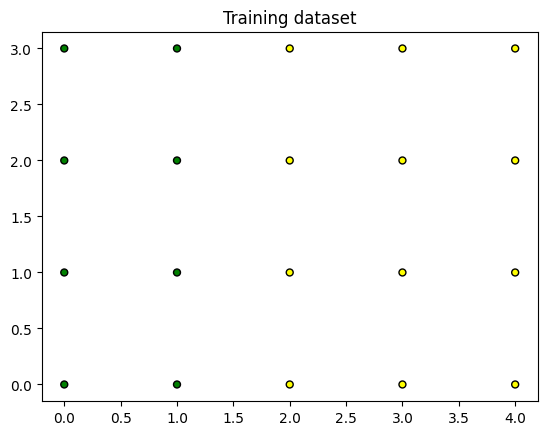

In [90]:
nbClasses = 2
# the 2d points
Xtrain = np.mgrid[0:4.1:1, 0:3.1:1].reshape(2, -1).T
# the classes
yTrain = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # classe de chaque élément
# the vector of colors for drawing purpose
colors = np.array(["green", "yellow", "black"])
# let draw the points using colored circles with black edges
plt.title("Training dataset")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

Set a variable 'kNN' to the number of neighbors you would like to consider (start with 5). A new point will be denoted by 'newX'.

In [3]:
newX = [0.5, 1]  # ceci est un point
nKNN = 5  # ceci est le nombre de voisins qu'on va considérer lors de nos études

**Question 1:** Compute all Euclidean distances between this new point and all points in the training dataset. You will need [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [numpy.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) functions.

In [9]:
#list of all distances
# your work here
distance = []
for pointX in Xtrain:
    distance.append(np.sqrt(np.power(pointX[0] - newX[0], 2) + np.power(pointX[1] - newX[1], 2)))
#distance = np.sqrt(np.sum(np.power(Xtrain - newX,2), axis=1))
print(distance)
# pour améliorer les performances, on peut aussi afficher juste après le append dans la boucle.

[1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.8027756377319946, 1.5, 1.8027756377319946, 2.5, 2.692582403567252, 2.5, 2.692582403567252, 3.2015621187164243, 3.640054944640259, 3.5, 3.640054944640259, 4.031128874149275]


Ici, on utilise simplement la formule mathématique :
$racine((x1-x2)^2  + (y1-y2)^2))$ qui sert à calculer la distance entre les points A (x1, y1) et B (x2, y2).
Dans l'exercice, on calcule la distance entre chaque point contenu dans Xtrain et le point qu'on décide d'étudier : newX.

Xtrain[i][0] signifie qu'on récupère l'élément d'indice i dans le tableau Xtrain. Or l'élément i est lui-même un tableau qui contient deux coordoonnées x et y (il s'agit donc d'un point) de la façon suivante : [x, y]
En faisant Xtrain[i][0], je récupère donc l'abscisse de ce point.
En faisant Xtrain[i][1], j'en récupère l'ordonnée.

Ce qui donne donc des calculs du type :  $racine((Xtrain[0][0]-newX[0])^2  + (Xtrain[0][1]-newX[1])^2))$, et ainsi de suite, pour les N éléments du tableau Xtrain.

**Question 2:** Sort the distances and build an array of indices of training points using [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [12]:
# your work here
res = np.argsort(distance)
print(res)

[ 1  5  0  2  6  4  9  8 10  7  3 11 13 12 14 15 17 18 16 19]


Dans cet exercice, argsort renvoie simplement les indices des éléments contenus dans le tableau distance s'ils étaient triés.
Autrement dit, le premier élément est l'élément d'indice 1, donc on sait alors que si on triait le tableau distance, le premier element serait l'élément d'indice 1, à savoir la valeur 0.5.
Le deuxième élément du tableau trié serait alors le cinquième élément du tableau distance (pas trié), etc.

**Question 3:** Take the indices of 'nKNN' smallest distances. Build an array 'Xn' of the training points at these indices and 'yn' for the corresponding classes.

In [25]:
# nKNN smallest distances indices
nei = res[0:nKNN]

# nKNN closest data
Xn = []
yn = []
for i in nei:
    Xn.append(Xtrain[i])
    yn.append(yTrain[i])
Xn = np.array(Xn)
print(nei)
print(Xn)
print(yn)

[1 5 0 2 6]
[[0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [1. 2.]]
[0, 0, 0, 0, 0]


```python
nei = res[0:nKNN]
```
Ce code permet de récupérer les nKNN premiers éléments du tableau "res", et de stocker le résultat dans nei.
Autrement dit, ce code récupère en fait ici les 5 premiers indices des éléments si le tableau distance était trié.

Par la suite, on parcourt ces indices, et on récupère les éléments de Xtrain qui ont permis d'obtenir les éléments du tableau distance qui ont ces indices.
On rappelle :
- Xtrain -> contient des points
- newX -> point étudié
- distance -> tableau contenant la distance entre chaque élément de Xtrain et newX
- res -> tableau contenant les indices des éléments du tableau "distance" s'il était trié
- nei -> tableau contenant les indices des nKNN premiers éléments du tableau "res"

```python
for i in nei:
    Xn.append(Xtrain[i])
```

Ce code permet alors de récupérer les points du tableau Xtrain qui ont permis d'obtenir les nKNN plus petites distances
par rapport au point newX.

Car ici, le but est de trouver les nKNN voisins les plus proches du point qu'on étudie. Les points les plus proches sont ceux qui ont la distance la plus courte par rapport au point étudié.


```python
for i in nei:
    yn.append(yTrain[i])
```

Ce code permet de récupérer les classes (la nature) des points récupérés dans Xtrain juste au dessus.
L'élément d'indice 0 de yTrain correspond à l'élément d'indice 0 de Xtrain.


 **Question 4:** Using 'yn' compute the majority vote. Don't consider ambiguity now. [numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) will be useful.

In [41]:
# majority vote for the class

# your work here
classes, counts = np.unique(yn, return_counts=True)
maxOccIndex = np.argmax(counts)  # renvoie l'indice de l'occurrence la plus élévée
classe = classes[
    maxOccIndex]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
print("classe = ", classe)

classe =  0


Dans cet exercice, np.unique va retourner des tuples (classe, nbOccurrence) à partir du tableau yn.
On remarque qu'on met à True un argument optionnel de la fonction np.unique : return_counts, qui permet justement de renvoyer ces occurrences.
On stocke les classes renvoyées dans la variable du même nom, et on stocke les nombres d'occurrence de ces classes dans la variable counts.

Cela va en fait nous permettre de faire un choix.
En effet, le but de cet exercice d'avoir un élément étudié en entrée (newX), et de pouvoir classifier cet élément à partir des informations/points dont on dispose déjà. Dans notre cas, on veut classifier des points, on sert alors de distances, comme on a pu le voir précédemment.
En ayant les points les plus proches du point étudié et en ayant leur classe, cela nous permet de trancher dans notre choix de classe pour notre nouvel élément.
Si notre élément étudié est plus proche des éléments de classe 0, alors il ira dans la classe 0. Si notre élément étudié est plus proche des éléments de classe 1, alors il ira dans la classe 1.
Pour pouvoir déterminer si notre élément étudié est plus proche d'une classe que de l'autre, il suffit de prendre son entourage/ses voisins comme on l'a fait, de calculer des distances, etc, comme on l'a déjà fait, et de voir, parmi cet échantillon de voisins étudiés, combien sont dans la classe 0, et combien sont dans la classe 1.
S'il y a plus de points de classe 0 que d'éléments de classe 1 (autrement dit, si notre point étudié est plus proche en termes de distance des points de classe 0 que des éléments de classe 1), alors il ira dans la classe 0. Dans le cas contraire, il ira dans la classe 1.

Argmax permet justement d'extraire l'indice de la plus grande occurrence trouvée parmi les classes et points présents dans nos informations.
On récupère ensuite la classe correspondant à ce nombre d'occurrence le plus élevé grâce à cet indice. Puisque le nombre d'occurrence et la classe correspondante auront les mêmes indices dans leurs tableaux respectifs classes et counts.

Dans cet exercice, il nous est demandé de ne pas gérer l'ambiguïté, j'explique ce qu'est l'ambiguïté dans la prochaine question.

**Question 4bis:** The same but highlight the ambiguity by assigning the classe 'nbClasses' 

In [43]:
# majority vote for the class

#your work here
classes, counts = np.unique(yn, return_counts=True)
nbOfMaxClasses = np.count_nonzero(
    counts == np.max(counts))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
if nbOfMaxClasses > 1:
    classe = nbClasses
else:
    maxOccIndex = np.argmax(counts)  # renvoie l'indice de l'occurrence la plus élevée
    classe = classes[
        maxOccIndex]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
print("classe = ", classe)

classe =  0


L'ambiguïté, avec un exemple simple est : si mon point étudié est aussi proche de la classe 0 que de la classe 1, dans quelle classe est-ce que je le mets ?

Ici :

```python
np.count_nonzero(counts == np.max(counts))
```

Ce code permet de compter le nombre d'éléments du tableau counts qui sont égaux à np.max(counts), la valeur maximum du tableau counts.

**Question 5:** Plot the training dataset as before. In addition, plot the neighbors point using size 100 instead of 25. Plot the new point using '.' marker, in red. Play with the parameter k and the position of this new point.
    

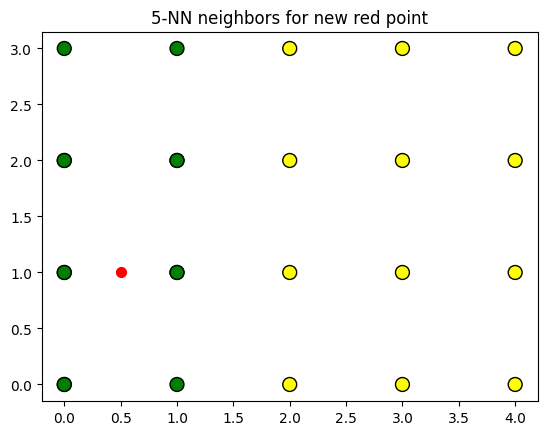

In [55]:
thetitle = str(nKNN) + "-NN neighbors for new red point"
plt.title(thetitle)

# your work here

# let draw the points using colored circles with black edges
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=100, edgecolor="k")
plt.scatter(Xn[:, 0], Xn[:, 1], marker="o", c=colors[yn], s=100, edgecolor="k")
plt.scatter(newX[0], newX[1], marker=".", c="red", s=200, edgecolor="r")  # contour noir au point rouge

**Question 6:** Put everything in the next function and return the class.

In [56]:
def voteKnn(xtrain, ytrain, nKnn, newData):  # your work here
    d = []
    for px in xtrain:
        d.append(np.sqrt(np.power(px[0] - newData[0], 2) + np.power(px[1] - newData[1], 2)))

    r = np.argsort(d)

    # nKNN smallest distances indices
    nei1 = r[0:nKnn]

    # nKNN closest data
    Xn1 = []
    yn1 = []
    for j in nei1:
        Xn1.append(xtrain[j])
        yn1.append(ytrain[j])

    cl, co = np.unique(yn1, return_counts=True)
    nbOfMC = np.count_nonzero(
        co == np.max(co))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
    if nbOfMC > 1:
        classe1 = nbClasses
    else:
        maxOccIndex1 = np.argmax(co)  # renvoie l'indice de l'occurrence la plus élevée
        classe1 = cl[
            maxOccIndex1]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
    return classe1


**Question 6bis:** Test this function on the previous new point.

In [57]:
# your work here
print(voteKnn(Xtrain, yTrain, nKNN, newX))

0


**Question 7:** Compute the class of all the points on a higher resolution grid and plot the result (new points will be plotted with a marker '.'). Do you agree with the results?

(378, 2)


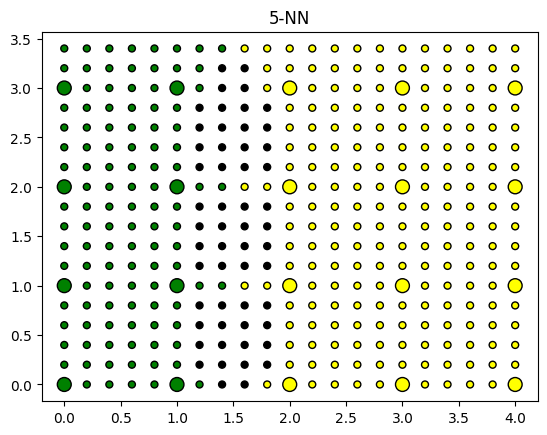

In [76]:
xTest = np.mgrid[0:4.2:0.2, 0:3.6:0.2].reshape(2, -1).T
print(xTest.shape)

thetitle = str(nKNN) + '-NN'
plt.title(thetitle)

# your work here
yTest = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
         2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
         2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(xTest[:, 0], xTest[:, 1], marker=".", c=colors[yTest], s=100, edgecolor="k")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=100, edgecolor="k")


### more complex synthetic data

In this part, you will load another dataset. You first need to download this file: http://www.i3s.unice.fr/~lingrand/si3/datasetRandom.pickle and then run the next cell.

In [78]:
with open('datasetRandom.pickle', 'rb') as inputData:
    Xd, yd = pickle.load(inputData)


**Question 8:** Plot the dataset.

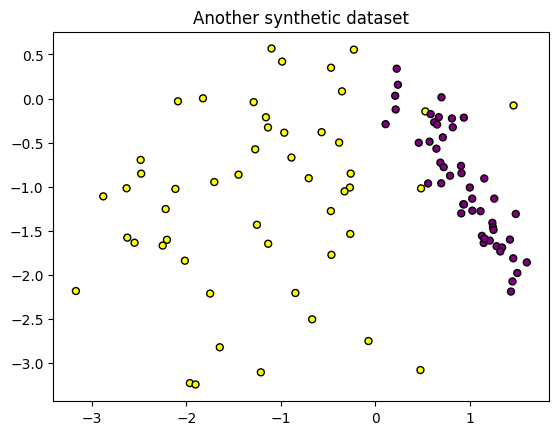

In [88]:
# your work here
plt.title("Another synthetic dataset")
col = np.array(["purple", "yellow"])
plt.scatter(Xd[:, 0], Xd[:, 1], marker=".", c=col[yd], s=100, edgecolor="k")

In [98]:
# use the first 60% for the training and the last 40% for the test
Xtrain = Xd[:60]
yTrain = yd[:60]
Xtest = Xd[60:]
yTest = yd[60:]

**Question 9:** Compute the label of the test set from the values of the training set. Plot the training set using round markers with black edge and plot the testing set without the black edge and using the predicted colors. If true class (yTest) and the predicted class do not match, add a red edge.

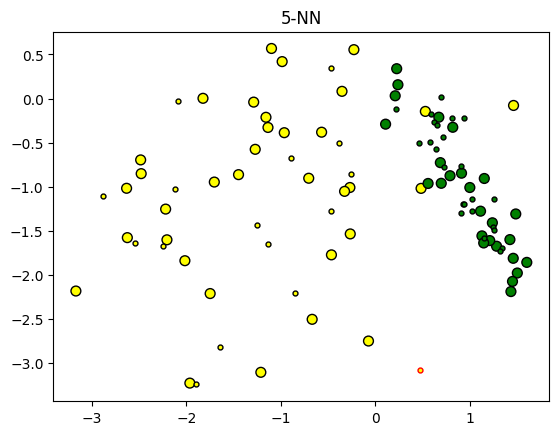

In [101]:
# your work here
plt.title("5-NN")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=50, edgecolor="k")
for i in range(0, len(Xtest)):
    px = Xtest[i]
    classeTheorique = voteKnn(Xtrain, yTrain, nKNN, px)
    classeReelle = yTest[i]
    if classeReelle != classeTheorique:
        plt.scatter(px[0], px[1], marker=".", c=colors[classeReelle], s=50, edgecolor="r")
    else:
        plt.scatter(px[0], px[1], marker=".", c=colors[classeReelle], s=50, edgecolor="k")

**Question 10:**: Could you build a numerical metric for the classification evaluation?

In [ ]:
# your work

## multi-class kNN (dimension 2)

**Question 11:** Same questions using more than 2 classes. Be careful of the tables of colors.

In [9]:
def voteKnn(xtrain, ytrain, nKnn, newData):  # your work here
    classWhenAmbiguity = 2

    d = []
    for PX in xtrain:
        d.append(np.sqrt(np.power(PX[0] - newData[0], 2) + np.power(PX[1] - newData[1], 2)))

    r = np.argsort(d)

    # nKNN smallest distances indices
    nei1 = r[0:nKnn]

    # nKNN closest data
    Xn1 = []
    yn1 = []
    for j in nei1:
        Xn1.append(xtrain[j])
        yn1.append(ytrain[j])

    cl, co = np.unique(yn1, return_counts=True)
    nbOfMC = np.count_nonzero(co == np.max(co))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
    if nbOfMC > 1:
        classe1 = classWhenAmbiguity
    else:
        maxOccIndex1 = np.argmax(co)  # renvoie l'indice de l'occurrence la plus élevée
        classe1 = cl[maxOccIndex1]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
    return classe1

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 2, 1]


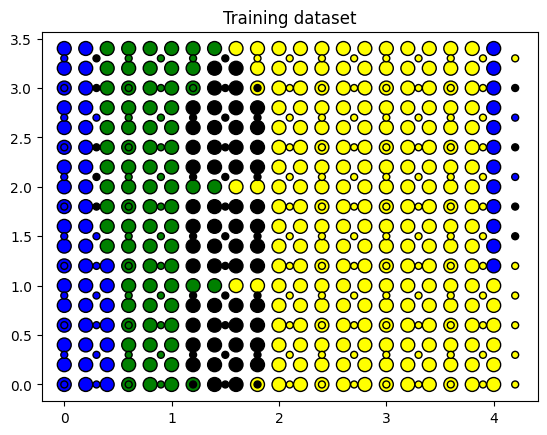

In [13]:
# your work
colors = np.array(["green", "yellow", "black", "blue", "pink"])
xTrain = np.mgrid[0:4.2:0.2, 0:3.6:0.2].reshape(2, -1).T
yTrain = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
         2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
         2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3]

xTest = np.mgrid[0:4.5:0.3, 0:3.4:0.3].reshape(2, -1).T
yTestResult = []
for c in xTest:
    yTestResult.append(voteKnn(xTrain, yTrain, 10, c))

print(yTestResult)
plt.title("Training dataset")
plt.scatter(xTrain[:, 0], xTrain[:, 1], marker="o", c=colors[yTrain], s=100, edgecolor="k")
plt.scatter(xTest[:, 0], xTest[:, 1], marker=".", c=colors[yTestResult], s=100, edgecolor="k")

Il suffit ici de rajouter des classes aux éléments compris dans notre ensemble.
Auparavant, nous étions limités par les classes 0 et 1 (ainsi que 2 en cas d'égalité, mais cela ne compte pas vraiment comme une classe à part entière).
Ici, nous définissons une ou des classes supplémentaires : dans mon cas, j'ai défini la classe "3".

## multi-class kNN in any dimension (>2)

The difficulty with this part is that you can no long plot the data ...

**Question 12:** Same questions (except plottings) using more than 2 dimensions.

In [37]:
# your work
def voteKnn(xtrain, ytrain, nKnn, newData):  # your work here
    classWhenAmbiguity = 2

    d = []
    for PX in xtrain:
        d.append(np.sqrt(np.power(PX[0] - newData[0], 2) + np.power(PX[1] - newData[1], 2) + np.power(PX[2] - newData[2], 2)))

    r = np.argsort(d)

    # nKNN smallest distances indices
    nei1 = r[0:nKnn]

    # nKNN closest data
    Xn1 = []
    yn1 = []
    for ji in nei1:
        Xn1.append(xtrain[ji])
        yn1.append(ytrain[ji])

    cl, co = np.unique(yn1, return_counts=True)
    nbOfMC = np.count_nonzero(co == np.max(co))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
    if nbOfMC > 1:
        classe1 = classWhenAmbiguity
    else:
        maxOccIndex1 = np.argmax(co)  # renvoie l'indice de l'occurrence la plus élevée
        classe1 = cl[maxOccIndex1]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
    return classe1

In [50]:
colors = np.array(["green", "yellow", "black", "blue", "pink"])
xTrain = np.mgrid[0:4.2:0.6, 0:3.6:0.8, 0:4:0.8].reshape(3, -1).T # reshape(3) pour la 3ème dimension du tableau en sortie
#print(len(xTrain))
yTrain = []
classPossibleValues = [0,1,2,3]
numberOfIterationsForOneClassValue = int(len(xTrain)/len(classPossibleValues))
#print(numberOfIterationsForOneValue)
for i in range(0, len(classPossibleValues)):
    for j in range(0, numberOfIterationsForOneClassValue): # Le nombre de fois qu'on va ajouter une valeur de classe
        yTrain.append(classPossibleValues[i])
yTrain = np.array(yTrain)
#print(yTrain)
xTest = np.mgrid[0:4.5:0.3, 0:3.8:0.3, 0:4.2:0.3].reshape(3, -1).T
yTestResult = []
for c in xTest:
    yTestResult.append(voteKnn(xTrain, yTrain, 10, c))
np.random.shuffle(yTestResult) # Pour rajouter un peu de piment dans la triste lecture monotone de chiffres en sortie
print(yTestResult)

[3, 2, 1, 0, 3, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 3, 2, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 2, 3, 2, 2, 0, 2, 1, 3, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 3, 0, 2, 3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 0, 1, 2, 3, 3, 2, 3, 2, 0, 2, 0, 1, 0, 2, 2, 3, 1, 2, 1, 0, 3, 0, 1, 3, 2, 0, 2, 0, 0, 2, 2, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2, 0, 3, 2, 1, 0, 2, 2, 3, 2, 2, 0, 2, 1, 3, 0, 3, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 3, 0, 0, 0, 1, 2, 3, 3, 1, 2, 2, 2, 2, 0, 0, 1, 3, 2, 2, 3, 0, 2, 0, 0, 2, 3, 2, 2, 3, 3, 0, 3, 1, 2, 2, 2, 1, 3, 0, 3, 2, 0, 2, 3, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 3, 2, 0, 3, 3, 2, 1, 3, 2, 0, 0, 1, 2, 3, 2, 3, 0, 2, 1, 0, 2, 2, 0, 3, 0, 2, 3, 2, 2, 3, 2, 0, 1, 0, 1, 3, 0, 0, 0, 0, 3, 2, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 2, 3, 0, 2, 0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 0, 1, 2, 1, 1, 2, 3, 2, 0, 3, 2, 2, 0, 2, 3, 3, 3, 0, 0, 3, 1, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 3, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 3, 3, 2, 2, 

## kdTree

If you reach this part, you are skilled enough to also implement the kd-tree! Start with 2d data.